# Clustering and Recommendation System
 Analysing the customer 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Analysing and Cleaning the Data

In [5]:
PHD = pd.read_csv('Pune house data.csv')

In [6]:
PHD.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [7]:
PHD.isnull().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

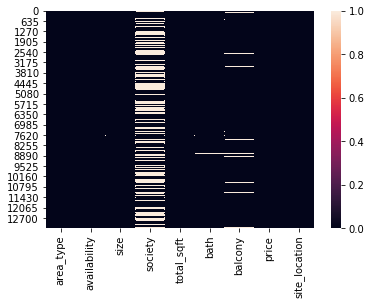

In [8]:
sns.heatmap(PHD.isnull())

In [9]:
PHD = PHD.dropna()

In [10]:
PHD.isnull().sum()

area_type        0
availability     0
size             0
society          0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
dtype: int64

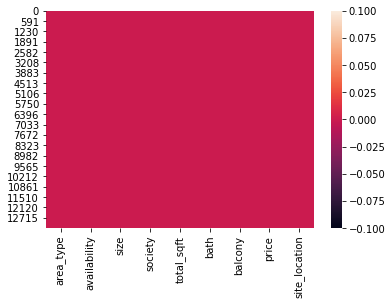

In [11]:
sns.heatmap(PHD.isnull())

In [12]:
PHD.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
5,Super built-up Area,Ready To Move,2 BHK,DuenaTa,1170,2.0,1.0,38.00,Balaji Nagar
11,Plot Area,Ready To Move,4 Bedroom,Prrry M,2785,5.0,3.0,295.00,Bopodi


In [13]:
PHD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7496 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      7496 non-null   object 
 1   availability   7496 non-null   object 
 2   size           7496 non-null   object 
 3   society        7496 non-null   object 
 4   total_sqft     7496 non-null   object 
 5   bath           7496 non-null   float64
 6   balcony        7496 non-null   float64
 7   price          7496 non-null   float64
 8   site_location  7496 non-null   object 
dtypes: float64(3), object(6)
memory usage: 585.6+ KB


In [14]:
PHD.describe()

,bath,balcony,price
count,7496.000000,7496.000000,7496.000000
mean,2.458511,1.630203,96.863925
std,0.881134,0.779911,105.380142
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,49.500000
50%,2.000000,2.000000,69.800000
75%,3.000000,2.000000,105.000000
max,9.000000,3.000000,2700.000000


In [15]:
for col in PHD:
    print(PHD[col].unique())
    print("\n")

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']


['19-Dec' 'Ready To Move' '18-Nov' '17-Oct' '21-Dec' '19-Sep' '20-Sep'
 '18-Mar' '18-Apr' '20-Aug' '19-Mar' '17-Sep' '17-Aug' '19-Apr' '22-Dec'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '18-May' '18-Dec' '21-Jun' '18-Sep'
 '17-May' '17-Jun' '18-Oct' '21-May' '20-Dec' '18-Jun' '16-Mar' '22-Jun'
 '17-Dec' '21-Feb' '19-May' '17-Nov' '20-Oct' '20-Jun' '18-Feb' '19-Feb'
 '21-Oct' '21-Jan' '17-Mar' '19-Jun' '17-Apr' '22-May' '19-Oct' '21-Jul'
 '21-Nov' '21-Mar' '19-Jul' '20-Jan' '21-Sep' '18-Jan' '20-Mar' '19-Nov'
 '15-Jun' '19-Aug' '20-May' '20-Nov' '20-Jul' '20-Feb' '15-Dec' '21-Aug'
 '16-Oct' '22-Nov' '16-Dec' '15-Aug' '17-Jan' '16-Nov' '20-Apr' '22-Jan'
 '16-Jan' '17-Feb' '14-Jul']


['2 BHK' '4 Bedroom' '3 BHK' '3 Bedroom' '1 RK' '4 BHK' '1 BHK' '5 BHK'
 '11 BHK' '5 Bedroom' '9 BHK' '2 Bedroom' '6 BHK' '7 BHK' '6 Bedroom']


['Coomee ' 'Theanmp' 'Soiewre' ... 'SJovest' 'ThhtsV ' 'RSntsAp']


['1056' '2600' '1521' ... '19

In [16]:
PHD['price']

0         39.07
1        120.00
3         95.00
5         38.00
11       295.00
          ...  
13313     57.00
13314    112.00
13315    231.00
13317     60.00
13318    488.00
Name: price, Length: 7496, dtype: float64

In [17]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

# Displaying all the rows that are not integers
PHD[~PHD['total_sqft'].apply(isFloat)].head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
30,Super built-up Area,19-Dec,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000,Gultekdi
122,Super built-up Area,18-Mar,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000,Ganeshkhind
137,Super built-up Area,19-Mar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005,Khadaki
165,Super built-up Area,18-Dec,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490,Prabhat Road
188,Super built-up Area,Ready To Move,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800,Wakadewadi


In [18]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    
PHD['new_total_sqft'] = PHD.total_sqft.apply(convert_sqft_to_num)
PHD = PHD.drop('total_sqft', axis='columns')
PHD.head()

,area_type,availability,size,society,bath,balcony,price,site_location,new_total_sqft
0,Super built-up Area,19-Dec,2 BHK,Coomee,2.0,1.0,39.07,Alandi Road,1056.0
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,5.0,3.0,120.00,Ambegaon Budruk,2600.0
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,3.0,1.0,95.00,Aundh,1521.0
5,Super built-up Area,Ready To Move,2 BHK,DuenaTa,2.0,1.0,38.00,Balaji Nagar,1170.0
11,Plot Area,Ready To Move,4 Bedroom,Prrry M,5.0,3.0,295.00,Bopodi,2785.0


In [19]:
df=PHD.copy()

In [20]:
df['price_per_sqft'] = (df['price']*100000)/df['new_total_sqft']
df.head()

,area_type,availability,size,society,bath,balcony,price,site_location,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,2 BHK,Coomee,2.0,1.0,39.07,Alandi Road,1056.0,3699.810606
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,5.0,3.0,120.00,Ambegaon Budruk,2600.0,4615.384615
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,3.0,1.0,95.00,Aundh,1521.0,6245.890861
5,Super built-up Area,Ready To Move,2 BHK,DuenaTa,2.0,1.0,38.00,Balaji Nagar,1170.0,3247.863248
11,Plot Area,Ready To Move,4 Bedroom,Prrry M,5.0,3.0,295.00,Bopodi,2785.0,10592.459605


In [21]:
df['size']=df['size'].str.split(' ',expand=True)[0].astype(np.number)

In [22]:
df.head()

,area_type,availability,size,society,bath,balcony,price,site_location,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,2.0,Coomee,2.0,1.0,39.07,Alandi Road,1056.0,3699.810606
1,Plot Area,Ready To Move,4.0,Theanmp,5.0,3.0,120.00,Ambegaon Budruk,2600.0,4615.384615
3,Super built-up Area,Ready To Move,3.0,Soiewre,3.0,1.0,95.00,Aundh,1521.0,6245.890861
5,Super built-up Area,Ready To Move,2.0,DuenaTa,2.0,1.0,38.00,Balaji Nagar,1170.0,3247.863248
11,Plot Area,Ready To Move,4.0,Prrry M,5.0,3.0,295.00,Bopodi,2785.0,10592.459605


In [23]:
df = df.drop('society',axis = 'columns')

In [24]:
df.head()

,area_type,availability,size,bath,balcony,price,site_location,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,2.0,2.0,1.0,39.07,Alandi Road,1056.0,3699.810606
1,Plot Area,Ready To Move,4.0,5.0,3.0,120.00,Ambegaon Budruk,2600.0,4615.384615
3,Super built-up Area,Ready To Move,3.0,3.0,1.0,95.00,Aundh,1521.0,6245.890861
5,Super built-up Area,Ready To Move,2.0,2.0,1.0,38.00,Balaji Nagar,1170.0,3247.863248
11,Plot Area,Ready To Move,4.0,5.0,3.0,295.00,Bopodi,2785.0,10592.459605


In [25]:
df.availability=(df.availability=='Ready To Move')
df.availability.replace({True:1,False:0},inplace=True)
df.availability=df.availability.astype(object)

In [26]:
df.isnull().sum()

area_type          0
availability       0
size               0
bath               0
balcony            0
price              0
site_location      0
new_total_sqft    15
price_per_sqft    15
dtype: int64

In [27]:
df.dropna()

,area_type,availability,size,bath,balcony,price,site_location,new_total_sqft,price_per_sqft
0,Super built-up Area,0,2.0,2.0,1.0,39.07,Alandi Road,1056.0,3699.810606
1,Plot Area,1,4.0,5.0,3.0,120.00,Ambegaon Budruk,2600.0,4615.384615
3,Super built-up Area,1,3.0,3.0,1.0,95.00,Aundh,1521.0,6245.890861
5,Super built-up Area,1,2.0,2.0,1.0,38.00,Balaji Nagar,1170.0,3247.863248
11,Plot Area,1,4.0,5.0,3.0,295.00,Bopodi,2785.0,10592.459605
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,1,3.0,2.0,1.0,57.00,Padmavati,1345.0,4237.918216
13314,Super built-up Area,1,3.0,3.0,3.0,112.00,Parvati Darshan,1715.0,6530.612245
13315,Built-up Area,1,5.0,4.0,0.0,231.00,Pashan,3453.0,6689.834926
13317,Built-up Area,1,2.0,2.0,1.0,60.00,Pirangut,1141.0,5258.545136


# Removing Outliers

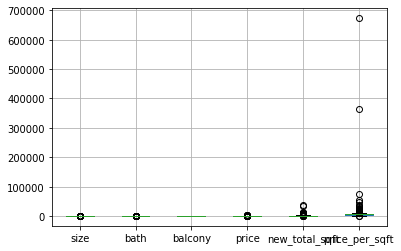

In [28]:
df.boxplot()

In [29]:
# Using 
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1
IQR

df = df[~((df) > (q3 + (1.5 * IQR))).any(axis=1)]

df.head()

,area_type,availability,size,bath,balcony,price,site_location,new_total_sqft,price_per_sqft
0,Super built-up Area,0,2.0,2.0,1.0,39.07,Alandi Road,1056.0,3699.810606
3,Super built-up Area,1,3.0,3.0,1.0,95.00,Aundh,1521.0,6245.890861
5,Super built-up Area,1,2.0,2.0,1.0,38.00,Balaji Nagar,1170.0,3247.863248
12,Super built-up Area,1,2.0,2.0,1.0,38.00,Budhwar Peth,1000.0,3800.000000
14,Plot Area,1,3.0,3.0,2.0,148.00,Camp,2250.0,6577.777778


In [30]:
df.shape

(6640, 9)

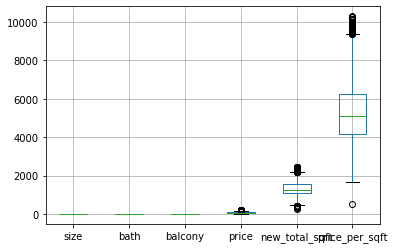

In [31]:
df.boxplot()

In [32]:
df.shape

(6640, 9)

# Exploratory Data Analysis

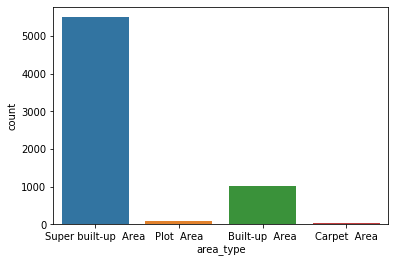

In [33]:
sns.countplot(x="area_type", data=df)

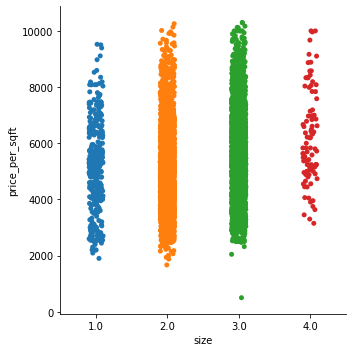

In [34]:
sns.catplot(x="size", y="price_per_sqft",data=df)

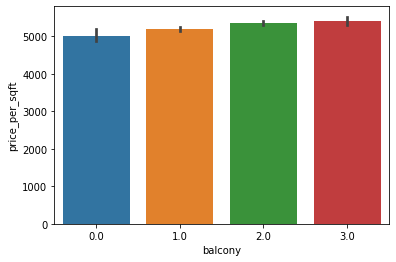

In [35]:
sns.barplot(x="balcony", y="price_per_sqft",data=df)

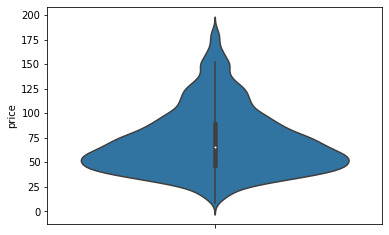

In [36]:
sns.violinplot(y = df.price)

Text(0, 0.5, 'Availability of Rooms')

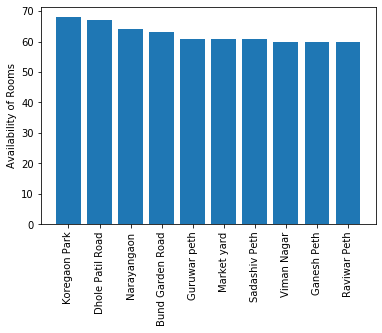

In [37]:
plt.bar(x=df[df['availability'] == 1].groupby('site_location')['availability'].agg('count').sort_values(ascending=False).head(10).index,height=df[df['availability'] == 1].groupby('site_location')['availability'].agg('count').sort_values(ascending=False).head(10))
plt.xticks(rotation=90)
plt.ylabel('Availability of Rooms')

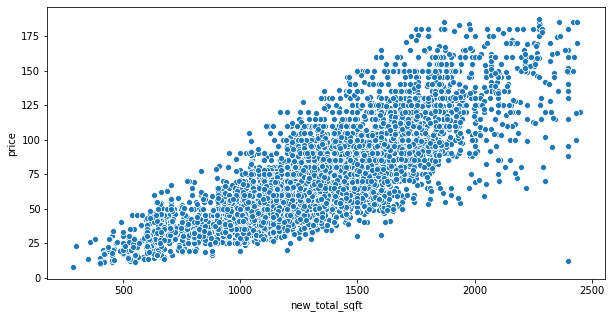

In [38]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="new_total_sqft", y="price", data=df)
plt.show()

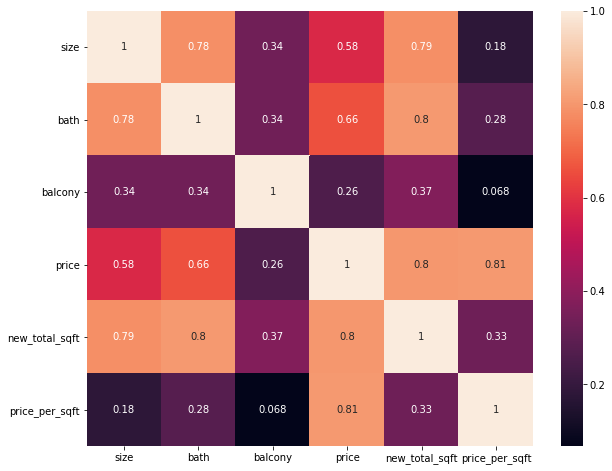

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Normalization

In [40]:
data_cat=df.select_dtypes(exclude=np.number)
data_num=df.select_dtypes(np.number)
data_cat=data_cat.reset_index()

In [41]:
ss=StandardScaler()
data_num_scaled=pd.DataFrame(ss.fit_transform(data_num),columns=data_num.columns)
data_num_scaled=data_num_scaled.reset_index()
data_num_scaled.head()

,index,size,bath,balcony,price,new_total_sqft,price_per_sqft
0,0,-0.645688,-0.432273,-0.792653,-0.980046,-0.726911,-1.059776
1,1,0.983871,1.186616,-0.792653,0.720798,0.578057,0.644689
2,2,-0.645688,-0.432273,-0.792653,-1.012585,-0.406983,-1.362330
3,3,-0.645688,-0.432273,-0.792653,-1.012585,-0.884068,-0.992704
4,4,0.983871,1.186616,0.531427,2.332541,2.623910,0.866870


In [42]:
df_scaled=pd.concat([data_num_scaled,data_cat],axis=1).drop('index',axis=1)
df_scaled.head()

,size,bath,balcony,price,new_total_sqft,price_per_sqft,area_type,availability,site_location
0,-0.645688,-0.432273,-0.792653,-0.980046,-0.726911,-1.059776,Super built-up Area,0,Alandi Road
1,0.983871,1.186616,-0.792653,0.720798,0.578057,0.644689,Super built-up Area,1,Aundh
2,-0.645688,-0.432273,-0.792653,-1.012585,-0.406983,-1.362330,Super built-up Area,1,Balaji Nagar
3,-0.645688,-0.432273,-0.792653,-1.012585,-0.884068,-0.992704,Super built-up Area,1,Budhwar Peth
4,0.983871,1.186616,0.531427,2.332541,2.623910,0.866870,Plot Area,1,Camp


## Encoding

In [43]:
df_encoded=pd.get_dummies(df,columns=['area_type','site_location'])
df_encoded.head()

,availability,size,bath,balcony,price,new_total_sqft,price_per_sqft,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,...,site_location_Vadgaon Budruk,site_location_Viman Nagar,site_location_Vishrant Wadi,site_location_Wadgaon Sheri,site_location_Wagholi,site_location_Wakadewadi,site_location_Wanowrie,site_location_Warje,site_location_Yerawada,site_location_other
0,0,2.0,2.0,1.0,39.07,1056.0,3699.810606,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3.0,3.0,1.0,95.00,1521.0,6245.890861,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,2.0,2.0,1.0,38.00,1170.0,3247.863248,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,2.0,2.0,1.0,38.00,1000.0,3800.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1,3.0,3.0,2.0,148.00,2250.0,6577.777778,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_scaled_enc=pd.get_dummies(df_scaled,columns=['area_type','site_location'])
df_scaled_enc.head()

,size,bath,balcony,price,new_total_sqft,price_per_sqft,availability,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,...,site_location_Vadgaon Budruk,site_location_Viman Nagar,site_location_Vishrant Wadi,site_location_Wadgaon Sheri,site_location_Wagholi,site_location_Wakadewadi,site_location_Wanowrie,site_location_Warje,site_location_Yerawada,site_location_other
0,-0.645688,-0.432273,-0.792653,-0.980046,-0.726911,-1.059776,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.983871,1.186616,-0.792653,0.720798,0.578057,0.644689,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.645688,-0.432273,-0.792653,-1.012585,-0.406983,-1.362330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.645688,-0.432273,-0.792653,-1.012585,-0.884068,-0.992704,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.983871,1.186616,0.531427,2.332541,2.623910,0.866870,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df2 = df_scaled_enc.copy()

In [46]:
df2.isnull().sum()

size                         0
bath                         0
balcony                      0
price                        0
new_total_sqft              12
                            ..
site_location_Wakadewadi     0
site_location_Wanowrie       0
site_location_Warje          0
site_location_Yerawada       0
site_location_other          0
Length: 108, dtype: int64

In [47]:
df2 = df2.dropna()

In [48]:
df2.isnull().sum()

size                        0
bath                        0
balcony                     0
price                       0
new_total_sqft              0
                           ..
site_location_Wakadewadi    0
site_location_Wanowrie      0
site_location_Warje         0
site_location_Yerawada      0
site_location_other         0
Length: 108, dtype: int64

In [49]:
df2.shape

(6628, 108)

In [50]:
df2.head()

,size,bath,balcony,price,new_total_sqft,price_per_sqft,availability,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,...,site_location_Vadgaon Budruk,site_location_Viman Nagar,site_location_Vishrant Wadi,site_location_Wadgaon Sheri,site_location_Wagholi,site_location_Wakadewadi,site_location_Wanowrie,site_location_Warje,site_location_Yerawada,site_location_other
0,-0.645688,-0.432273,-0.792653,-0.980046,-0.726911,-1.059776,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.983871,1.186616,-0.792653,0.720798,0.578057,0.644689,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.645688,-0.432273,-0.792653,-1.012585,-0.406983,-1.362330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.645688,-0.432273,-0.792653,-1.012585,-0.884068,-0.992704,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.983871,1.186616,0.531427,2.332541,2.623910,0.866870,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df.to_csv('cleaned_house_pune.csv')

In [52]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['site_location']= le.fit_transform(df['site_location'])
df['area_type'] = le.fit_transform(df['area_type'])
df.head()

,area_type,availability,size,bath,balcony,price,site_location,new_total_sqft,price_per_sqft
0,3,0,2.0,2.0,1.0,39.07,0,1056.0,3699.810606
3,3,1,3.0,3.0,1.0,95.00,3,1521.0,6245.890861
5,3,1,2.0,2.0,1.0,38.00,5,1170.0,3247.863248
12,3,1,2.0,2.0,1.0,38.00,12,1000.0,3800.000000
14,2,1,3.0,3.0,2.0,148.00,14,2250.0,6577.777778


In [53]:
df_scaled=pd.DataFrame(ss.fit_transform(df),columns=df.columns)

In [54]:
df_scaled.head()

,area_type,availability,size,bath,balcony,price,site_location,new_total_sqft,price_per_sqft
0,0.447170,-1.778485,-0.645688,-0.432273,-0.792653,-0.980046,-1.728857,-0.726911,-1.059776
1,0.447170,0.562276,0.983871,1.186616,-0.792653,0.720798,-1.620369,0.578057,0.644689
2,0.447170,0.562276,-0.645688,-0.432273,-0.792653,-1.012585,-1.548044,-0.406983,-1.362330
3,0.447170,0.562276,-0.645688,-0.432273,-0.792653,-1.012585,-1.294904,-0.884068,-0.992704
4,-0.472375,0.562276,0.983871,1.186616,0.531427,2.332541,-1.222579,2.623910,0.866870


# Clustering

## Properties grouped with similiar Sqft and Price

In [55]:
data_cluster=df_encoded.copy()

In [56]:
cls=df2[['new_total_sqft','price_per_sqft']] # clusters the houses

In [57]:
cls

,new_total_sqft,price_per_sqft
0,-0.726911,-1.059776
1,0.578057,0.644689
2,-0.406983,-1.362330
3,-0.884068,-0.992704
4,2.623910,0.866870
...,...,...
6635,-0.359275,-1.272778
6636,0.594895,2.688770
6637,0.084134,-0.699541
6638,1.122495,0.835295


In [58]:
wcss = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(cls)
    wcss.append(kmeans.inertia_)

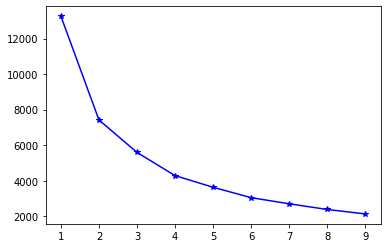

In [59]:
plt.plot(range(1,10),wcss,marker='*',color='b')

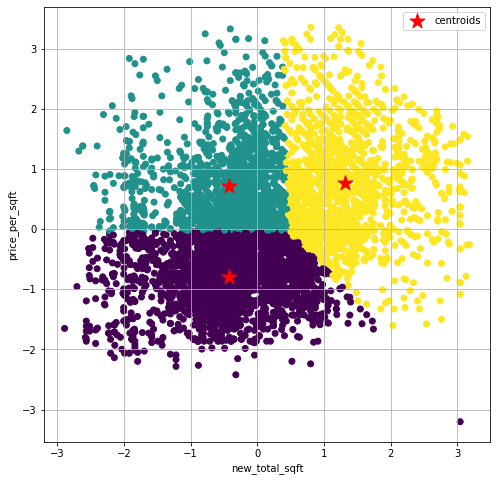

In [60]:
X = cls.copy()
cols = list(X.columns) #convert the Series' in lists
km = KMeans(n_clusters=3,n_init=10, random_state=0)
y_km = km.fit_predict(X)
plt.figure(figsize=(8, 8))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=km.labels_.astype(float))

# plotting the centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='centroids')
plt.xlabel(cols[0])
plt.ylabel(cols[1])
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

## Properties grouped with Site Location and Price

In [61]:
cls2=df_scaled[['site_location','price_per_sqft']]

In [62]:
cls2 = cls2.dropna()

In [63]:
wcss = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(cls2)
    wcss.append(kmeans.inertia_)

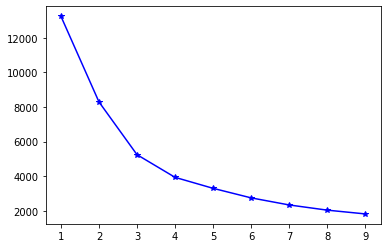

In [64]:
plt.plot(range(1,10),wcss,marker='*',color='b')

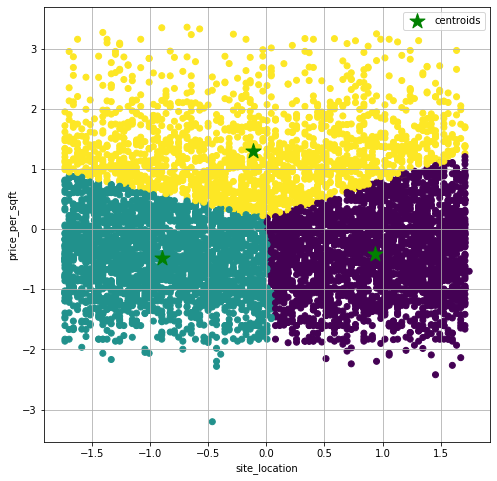

In [65]:
X = cls2.copy()
cols = list(X.columns) #convert the Series' in lists
km = KMeans(n_clusters=3,n_init=10, random_state=0)
y_km = km.fit_predict(X)
plt.figure(figsize=(8, 8))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=km.labels_.astype(float))

# plotting the centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='green', label='centroids')
plt.xlabel(cols[0])
plt.ylabel(cols[1])
plt.legend(scatterpoints=1)
plt.grid()
plt.show()